In [1]:
import numpy as np
import pandas as pd
from data_anonymizer import DataAnonymizer

In [2]:
df = pd.read_csv('hospital.csv')

In [3]:
df.head()

,NRIC,Name,Gender,BloodType,Disease,Age,Zipcode,BMI,DateOfDiagnosis
0,T0581222F,Russell Waldbauer,M,O,Nipah,63,281223,28.7,2001-06-20
1,F0005772O,Latoya Brown,M,AB,Conjunctivitis,42,587904,37.2,2011-06-02
2,T7303748A,Robert Benthall,M,A,Typhoid,85,770807,27.0,1990-08-23
3,T6353952U,Pearl Almaraz,F,B,HIV/ AIDS,27,187483,31.2,2003-10-15
4,T0357152V,Jean Fulker,F,A,HIV/ AIDS,34,624914,36.2,2000-04-20


In [4]:
df.shape

(500, 9)

In [5]:
anonymizer = DataAnonymizer(df)

Auto Detecting all Data Properties...
Running Column Type Checker...
Running Information Type Checker...
Running Sensitivity Type Checker...
Constructing Properties Frame
Auto-Generated Properties Frame. To change a property, use the change_property method.


In [6]:
anonymizer.properties_frame

,Column Type,Information Type,Sensitivity Type
Column Name,,,
NRIC,Unique/Sparse,NRIC,Direct Identifier
Name,Unique/Sparse,Others,Non-Sensitive
Gender,Categorical,Others,Indirect Identifier
BloodType,Categorical,Others,Non-Sensitive
Disease,Others,Others,Non-Sensitive
Age,Continuous,Others,Indirect Identifier
Zipcode,Unique/Sparse,Others,Non-Sensitive
BMI,Continuous,Others,Non-Sensitive
DateOfDiagnosis,Unique/Sparse,Others,Non-Sensitive


In [7]:
anonymizer.change_property_rowwise("Name", ["Others", "Others", "Direct Identifier"])
anonymizer.change_property_rowwise("Disease", ["Categorical", "Others", "Non-Sensitive"])
anonymizer.change_property_rowwise("BloodType", ["Categorical", "Others", "Indirect Identifier"])
anonymizer.change_property_rowwise("Zipcode", ["Unique/Sparse", "Others", "Sensitive"])
anonymizer.change_property_rowwise("DateOfDiagnosis", ["Datetime", "Others", "Sensitive"])

,Column Type,Information Type,Sensitivity Type
Column Name,,,
NRIC,Unique/Sparse,NRIC,Direct Identifier
Name,Others,Others,Direct Identifier
Gender,Categorical,Others,Indirect Identifier
BloodType,Categorical,Others,Indirect Identifier
Disease,Categorical,Others,Non-Sensitive
Age,Continuous,Others,Indirect Identifier
Zipcode,Unique/Sparse,Others,Sensitive
BMI,Continuous,Others,Non-Sensitive
DateOfDiagnosis,Datetime,Others,Sensitive


In [8]:
anonymizer.get_mask_table()

,Transformer
Column Name,
NRIC,Mask NRIC
Name,Pseudonymise
Gender,Encode
BloodType,Encode
Disease,Retain
Age,Generalise (Numerical Bin Mean)
Zipcode,Pseudonymise
BMI,Retain
DateOfDiagnosis,Generalise (Date Bin Median)


In [9]:
anonymizer.list_allowed_transformations('BMI')

['Retain',
 'Generalise (Numerical Bin Mean)',
 'Generalise (Numerical Bin)',
 'Surpress',
 'Pseudonymise',
 'Full Masking',
 'Transpose',
 'Shuffle']

In [10]:
anonymizer.change_masking('Zipcode', 'Surpress')
anonymizer.change_masking('Gender', 'Surpress')

,Transformer
Column Name,
NRIC,Mask NRIC
Name,Pseudonymise
Gender,Surpress
BloodType,Encode
Disease,Retain
Age,Generalise (Numerical Bin Mean)
Zipcode,Surpress
BMI,Retain
DateOfDiagnosis,Generalise (Date Bin Median)


In [11]:
anonymizer.apply_masking()

,NRIC,Name,Gender,BloodType,Disease,Age,Zipcode,BMI,DateOfDiagnosis
0,*****222F,c6bb762107e2655ff62d1c3198b9150880b3ea9b6c59cd...,-,3,Nipah,64.0,-,28.7,2001-05-27 00:00:00
1,*****772O,4a85a5719f90e65700488aa0b3fc69d49220e01aba52eb...,-,1,Conjunctivitis,42.0,-,37.2,2011-01-27 00:00:00
2,*****748A,1bb7f6fd5f7f4ddd3986b5ab8b882ecf2d8cb4fb5156f2...,-,0,Typhoid,86.0,-,27.0,1991-09-19 12:00:00
3,*****952U,064acf7f1bc6cb77a6aded7fd80187e52c45e90881da79...,-,2,HIV/ AIDS,28.0,-,31.2,2004-08-16 12:00:00
4,*****152V,124f7b7c5237a6dc908a07b6450ac564a17622505816d0...,-,0,HIV/ AIDS,36.0,-,36.2,2001-05-27 00:00:00
...,...,...,...,...,...,...,...,...,...
495,*****191Y,0cd5c72f4467c420960babbe98bc3a63156c70c2bc8f19...,-,2,Rubella,42.0,-,38.8,2007-11-06 12:00:00
496,*****936K,32e3b7ecb62394f8c506b534587e50bf5a86a3d3abf199...,-,2,HIV/ AIDS,72.0,-,27.0,2011-01-27 00:00:00
497,*****134H,36fe77907746d69db0ed50a02ad2d1dcf9a898290b7eec...,-,0,Pneumococcal,86.0,-,35.5,1994-12-15 12:00:00
498,*****729M,6ca749259e9f85d188ca754bc36c6a84066c69400a5544...,-,0,Plague,86.0,-,34.3,2020-09-28 00:00:00


In [12]:
anonymizer.get_re_identification_table()

c:\Users\User\Desktop\SynPiper\anonymizer\data_anonymizer.py:272: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  default_non_duplicate_rows.loc[:, "count"] = 1


,Gender,BloodType,Age,count,reidentifiability proba
0,-,3,22.0,21,4.761905
1,-,0,86.0,19,5.263158
2,-,1,42.0,18,5.555556
3,-,1,86.0,18,5.555556
4,-,1,64.0,18,5.555556
5,-,0,22.0,17,5.882353
6,-,3,64.0,15,6.666667
7,-,0,42.0,15,6.666667
8,-,3,42.0,15,6.666667
9,-,2,86.0,15,6.666667


In [13]:
anonymizer.unique_row_proportion()

0.0

In [14]:
anonymizer.avg_re_identification_prob()

8.73930210656217

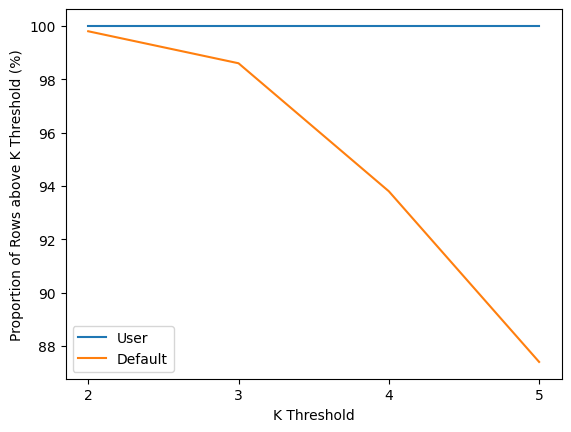

In [15]:
anonymizer.generate_k_threshold_plot()